In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [131]:
# import statement
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wujiangqi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wujiangqi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wujiangqi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## A statement of the problem you are investigating (WIP)



## Why is this problem relevant? Or, what inspired you to investigate this problem (WIP)

## Read data

In [132]:
vlog = pd.read_csv('vlog.csv')

In [133]:
vlog.head(5)

,username,author_id,video_desc,video_id,upload_time,duration,was_duet,hashtags,music_artist,music_title,is_verified,author_followers,author_likes,author_hearts,author_video_count,saves,likes,shares,plays,comments
0,MagicalAquatic,7140140605107127342,Another use for 360 cam #ocean #sea #vlog #tra...,7143031687490882858,1663116673,20,{'duetFromId': '0'},"['ocean', 'sea', 'vlog', 'travel', 'scuba', 's...",Hollow Coves,Coastline,False,276100,434,4800000,607,32900,706200,3355,10300000,1949
1,jah✰,6961499315445482501,imma still try to keep em daily… #LikeAMonarch...,7144924903270108462,1663557479,37,{'duetFromId': '0'},"['likeamonarch', 'sephoraconcealers', 'dayinmy...",jah✰,original sound,False,385500,30400,11900000,226,113900,2200000,9272,10200000,8096
2,Caroline Collins,6776019851430560774,From 2:45 AM to 4:59 AM ☕️ This is my Monday t...,7138820984827612459,1662136289,78,{'duetFromId': '0'},"['news', 'vlog']",Caroline Collins,original sound,False,1600000,27900,54600000,871,13700,663200,758,7700000,2215
3,🦞Craw Kingdom👑,6835639642319193094,😩 IM HAPPY NOW!!!! #chicharron #Mexican #somex...,7139230020718906666,1662231523,57,{'duetFromId': '0'},"['chicharron', 'mexican', 'somexican', 'food',...",🦞Craw Kingdom👑,RIP PEPPA PIG,False,3400000,13100,80700000,1813,13700,319500,3335,3800000,2720
4,Cassie Aran,6747490126719206405,HURRICANE IS GETTING WORSE😳 #daywithme #vlog #...,7147887060324584747,1664247151,63,{'duetFromId': '0'},"['daywithme', 'vlog', 'dailyvlog', 'dayintheli...",Petit Biscuit,Night Trouble,False,806900,2448,25200000,2801,27900,974200,2955,13500000,14800


## Basic info

In [134]:
vlog.shape

(999, 20)

In [135]:
vlog.dtypes

username              object
author_id              int64
video_desc            object
video_id               int64
upload_time            int64
duration               int64
was_duet              object
hashtags              object
music_artist          object
music_title           object
is_verified             bool
author_followers       int64
author_likes           int64
author_hearts          int64
author_video_count     int64
saves                  int64
likes                  int64
shares                 int64
plays                  int64
comments               int64
dtype: object

In [136]:
vlog.describe()

,author_id,video_id,upload_time,duration,author_followers,author_likes,author_hearts,author_video_count,saves,likes,shares,plays,comments
count,9.990000e+02,9.990000e+02,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000
mean,5.587109e+18,7.111583e+18,1.660123e+09,71.123123,2.603743e+06,27191.977978,1.298660e+08,896.934935,66392.746747,1.369237e+06,25418.334334,1.128784e+07,6958.658659
std,2.671875e+18,4.059729e+17,3.459084e+07,60.975716,4.934415e+06,44366.418207,2.813079e+08,940.621728,68833.930573,7.942861e+05,58489.360109,9.370577e+06,9582.143570
min,1.431400e+04,1.091123e+17,1.466357e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,39.000000,2.733000e+05,21.000000,9.538000e+05,0.000000
25%,6.585407e+18,7.046933e+18,1.640742e+09,30.000000,2.175500e+05,2882.000000,8.500000e+06,249.500000,26700.000000,8.895000e+05,2783.000000,5.700000e+06,2128.000000
50%,6.781315e+18,7.153473e+18,1.665548e+09,57.000000,9.205000e+05,12000.000000,3.100000e+07,549.000000,47100.000000,1.100000e+06,7533.000000,8.600000e+06,3986.000000
75%,6.969483e+18,7.240934e+18,1.685911e+09,90.000000,3.050000e+06,30650.000000,1.123000e+08,1301.000000,82000.000000,1.600000e+06,20750.000000,1.320000e+07,8035.500000
max,7.318645e+18,7.357814e+18,1.713125e+09,441.000000,5.440000e+07,618600.000000,1.900000e+09,7169.000000,584400.000000,8.700000e+06,834600.000000,8.540000e+07,97800.000000


## Where did you get the data from? (WIP)

## Description of the data (WIP)

## Data Cleaning

In [137]:
vlog = vlog.fillna('')

In [138]:
# Cleaning all the special characters and emojis
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U0001F900-\U0001F9FF"  # supplementary symbols and pictographs
         u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
         u"\U00002702-\U000027B0"  # Dingbats
         u"\U000024C2-\U0001F251" 
         "]+", flags=re.UNICODE) # The UNICODE pattern is generated by ChatGPT to detect emojis

for column in vlog.select_dtypes(include=['object']):
    vlog[column] = vlog[column].apply(lambda x: emoji_pattern.sub(r'', str(x)) if x else x)
# tokenize the video_desc with stop words
stop_words = set(stopwords.words('english'))

In [139]:
def tokenize_without_stopwords_and_symbols(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and re.match('^[a-zA-Z0-9]+$', word)]
    return filtered_tokens
def convert_to_list(hashtag_str):
    hashtags = hashtag_str.strip("[]").split("', '")
    hashtags = [tag.strip("'") for tag in hashtags if tag != '' and tag != "''" and tag != ","]
    return hashtags

vlog['hashtags'] = vlog['hashtags'].apply(convert_to_list)
vlog['video_desc'] = vlog['video_desc'].apply(tokenize_without_stopwords_and_symbols)

# transforming the upload_time to pd.datetime
vlog['upload_time'] = pd.to_datetime(vlog['upload_time'], unit= 's')

In [140]:
sia = SentimentIntensityAnalyzer()
vlog['video_desc_str'] = vlog['video_desc'].apply(' '.join)

# Define a function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the string version of video_desc
vlog['sentiment_score'] = vlog['video_desc_str'].apply(get_sentiment_score)

def transfer_to_cate(score):
#     if score < -0.25:
#         return -1
#     if score > 0.25:
#         return 1
#     return 0
    if abs(score) < 0.25:
        return 0
    return 1
vlog['sentiment_binary'] = vlog['sentiment_score'].apply(transfer_to_cate)

In [141]:
vlog = vlog.drop(columns = ['was_duet', 'music_artist', 'is_verified', 'author_likes', 'author_hearts', 'music_title','sentiment_score', 'video_desc_str'])

In [142]:
vlog.head(5)

,username,author_id,video_desc,video_id,upload_time,duration,hashtags,author_followers,author_video_count,saves,likes,shares,plays,comments,sentiment_binary
0,MagicalAquatic,7140140605107127342,"[another, use, 360, cam, ocean, sea, vlog, tra...",7143031687490882858,2022-09-14 00:51:13,20,"[ocean, sea, vlog, travel, scuba, snorkling, s...",276100,607,32900,706200,3355,10300000,1949,0
1,jah,6961499315445482501,"[imma, still, try, keep, em, likeamonarch, sep...",7144924903270108462,2022-09-19 03:17:59,37,"[likeamonarch, sephoraconcealers, dayinmylife,...",385500,226,113900,2200000,9272,10200000,8096,0
2,Caroline Collins,6776019851430560774,"[monday, friday, mornings, news, anchor, news,...",7138820984827612459,2022-09-02 16:31:29,78,"[news, vlog]",1600000,871,13700,663200,758,7700000,2215,0
3,Craw Kingdom,6835639642319193094,"[im, happy, chicharron, mexican, somexican, fo...",7139230020718906666,2022-09-03 18:58:43,57,"[chicharron, mexican, somexican, food, pork, c...",3400000,1813,13700,319500,3335,3800000,2720,1
4,Cassie Aran,6747490126719206405,"[hurricane, getting, worse, daywithme, vlog, d...",7147887060324584747,2022-09-27 02:52:31,63,"[daywithme, vlog, dailyvlog, dayinthelife, day...",806900,2801,27900,974200,2955,13500000,14800,1


## EDA

In [143]:
#Import lib
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale = 1.3)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

%config InlineBackend.figure_formats = ['svg']
plt.rcParams["figure.figsize"] = [10, 6]

### Distribution of variables:
- duration
- Upload time
- Sentiment

- video: saves, likes, shares, plays

QQ-plot (eg. likes - normal distribution)

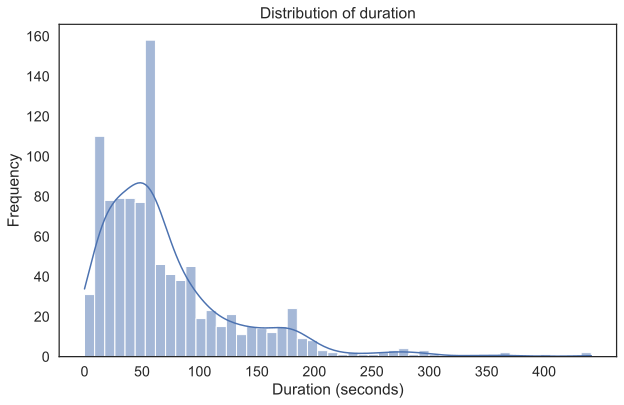

In [144]:
sns.histplot(data = vlog, x = 'duration', kde = True, bins = 50)
plt.xticks(range(0, int(vlog['duration'].max()) + 1, 50))

plt.title('Distribution of duration');
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

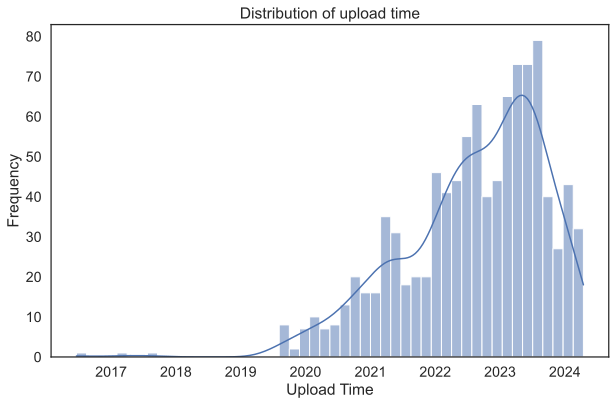

In [145]:
sns.histplot(data = vlog, x = 'upload_time', kde = True, bins = 50)
plt.title('Distribution of upload time');
plt.xlabel('Upload Time')
plt.ylabel('Frequency')
plt.show()

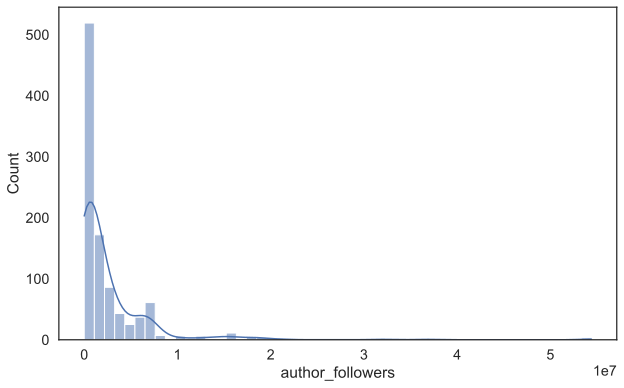

In [146]:
sns.histplot(data = vlog, x = 'author_followers', kde = True, bins = 50);


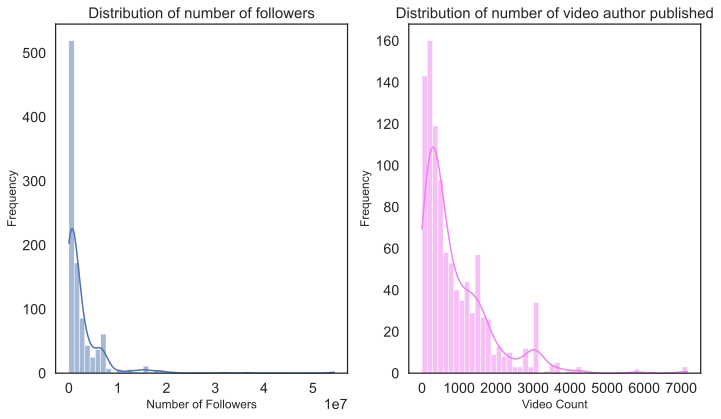

In [147]:
fig, axes = plt.subplots(1, 2)
sns.set(style="white", font_scale = 1)
# sns.set(font_scale = 1)

sns.histplot(data = vlog, x = 'author_followers', kde = True, bins = 50, ax = axes[0]);
axes[0].set_title('Distribution of number of followers', fontsize = 15)
axes[0].set_xlabel('Number of Followers', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data = vlog, x = 'author_video_count', kde = True, bins = 50, ax = axes[1], color = 'violet');
axes[1].set_title('Distribution of number of video author published', fontsize = 15)
axes[1].set_xlabel('Video Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

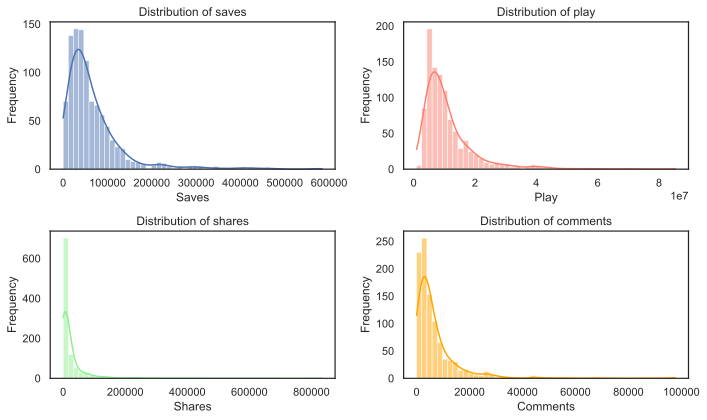

In [148]:
fig, axes = plt.subplots(2, 2)
# sns.set(font_scale = 1)
sns.histplot(data = vlog, x = 'saves', kde = True, bins = 50, ax = axes[0][0]);
axes[0][0].set_title('Distribution of saves')
axes[0][0].set_xlabel('Saves', fontsize=12)
axes[0][0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data = vlog, x = 'plays', kde = True, bins = 50, ax = axes[0][1], color = 'salmon');
axes[0][1].set_title('Distribution of play')
axes[0][1].set_xlabel('Play', fontsize=12)
axes[0][1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data = vlog, x = 'shares', kde = True, bins = 50, ax = axes[1][0], color = 'lightgreen');
axes[1][0].set_title('Distribution of shares')
axes[1][0].set_xlabel('Shares', fontsize=12)
axes[1][0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data = vlog, x = 'comments', kde = True, bins = 50, ax = axes[1][1], color = 'orange');
axes[1][1].set_title('Distribution of comments')
axes[1][1].set_xlabel('Comments', fontsize=12)
axes[1][1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

<AxesSubplot:xlabel='likes', ylabel='Count'>

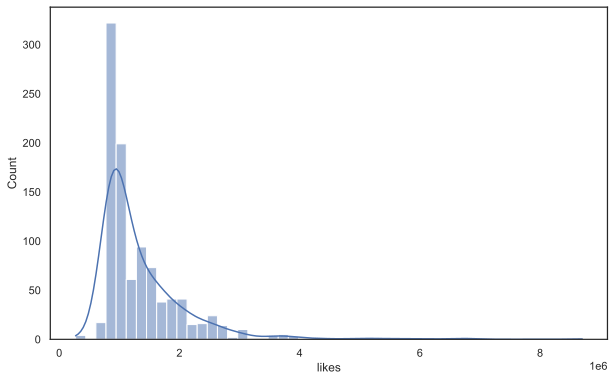

In [150]:
sns.histplot(data = vlog, x = 'likes', kde = True, bins = 50)


In [169]:
# # Generate the normal distribution object
# normal_dist = stats.norm(vlog['likes'].mean(), vlog['likes'].std())

# # Convert 'likes' column to a numpy array
# likes_arr = vlog['likes'].to_numpy()

# # Create the QQ plot
# sm.qqplot(likes_arr, normal_dist, line='45')

# # Show the plot
# plt.show()

In [159]:
# import statsmodels.api as sm
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# import numpy as np

# # Convert 'likes' column to a numpy array
# likes_arr = vlog['likes'].to_numpy()

# # Create QQ plot for normal distribution
# normal_dist = stats.norm(np.mean(likes_arr), np.std(likes_arr))
# plt.figure(figsize=(10, 6))
# sm.qqplot(likes_arr, normal_dist, line='45')
# plt.title('QQ Plot - Normal Distribution')
# plt.show()

# # Create QQ plot for exponential distribution
# exp_dist = stats.expon(scale=np.mean(likes_arr))
# plt.figure(figsize=(10, 6))
# sm.qqplot(likes_arr, exp_dist, line='45')
# plt.title('QQ Plot - Exponential Distribution')
# plt.show()

# # Create QQ plot for log-normal distribution
# shape, loc, scale = stats.lognorm.fit(likes_arr, floc=0)
# lognorm_dist = stats.lognorm(s=shape, loc=loc, scale=scale)
# plt.figure(figsize=(10, 6))
# sm.qqplot(likes_arr, lognorm_dist, line='45')
# plt.title('QQ Plot - Log-Normal Distribution')
# plt.show()


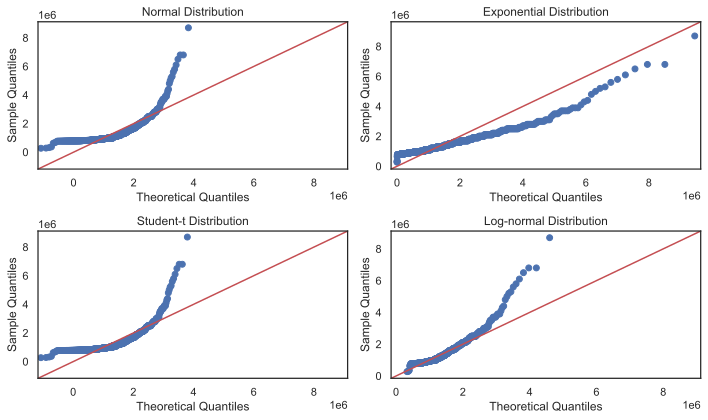

In [160]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Convert 'likes' column to a numpy array
likes_arr = vlog['likes'].to_numpy()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Normal distribution
normal_dist = stats.norm(np.mean(likes_arr), np.std(likes_arr))
sm.qqplot(likes_arr, normal_dist, line='45', ax=axs[0, 0])
axs[0, 0].set_title('Normal Distribution')

# Exponential distribution
exp_dist = stats.expon(scale=np.mean(likes_arr))
sm.qqplot(likes_arr, exp_dist, line='45', ax=axs[0, 1])
axs[0, 1].set_title('Exponential Distribution')

# Student-t distribution
df, loc, scale = stats.t.fit(likes_arr)
t_dist = stats.t(df, loc, scale)
sm.qqplot(likes_arr, t_dist, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Student-t Distribution')

# log-normal distribution
shape, loc, scale = stats.lognorm.fit(likes_arr, floc=0)
lognorm_dist = stats.lognorm(s=shape, loc=loc, scale=scale)
sm.qqplot(likes_arr, lognorm_dist, line='45', ax=axs[1, 1])
axs[1, 1].set_title('Log-normal Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

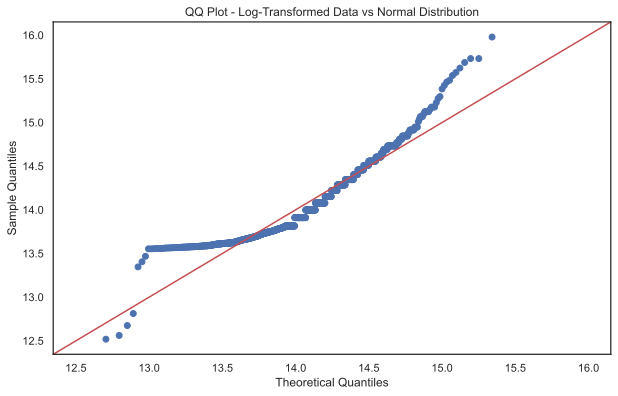

In [161]:
# log transform likes
log_likes_arr = np.log(likes_arr + 1)  # Adding 1 to avoid log(0)

# Fit normal distribution to log-transformed data
log_normal_dist = stats.norm(np.mean(log_likes_arr), np.std(log_likes_arr))

# Create QQ plot
plt.figure(figsize=(10, 6))
sm.qqplot(log_likes_arr, log_normal_dist, line='45')
plt.title('QQ Plot - Log-Transformed Data vs Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [170]:
# sqrt transform likes
sqrt_likes_arr = np.sqrt(likes_arr)
sqrt_normal_dist = stats.norm(np.mean(sqrt_likes_arr), np.std(sqrt_likes_arr))
plt.figure(figsize=(10, 6))
sm.qqplot(sqrt_likes_arr, sqrt_normal_dist, line='45')
plt.show()

### Relation between variables:

heat map

like vs other var

In [165]:
def log_trans(x):
    return np.log(x + 1)
vlog['log_likes'] = vlog['likes'].apply(log_trans)

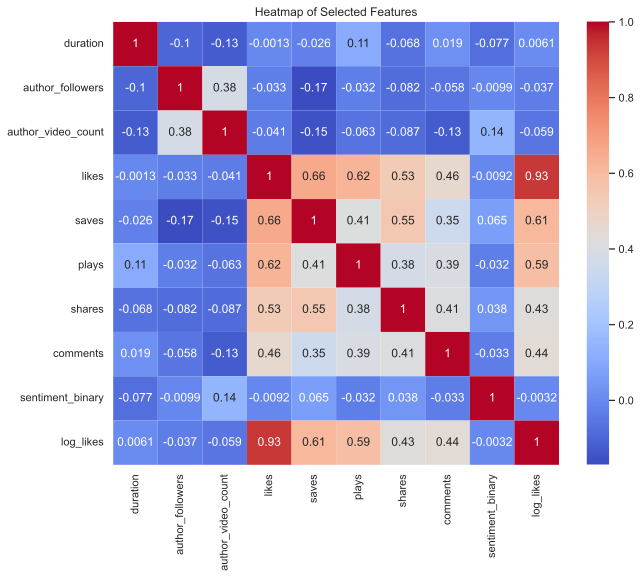

In [166]:
selected_columns = ['duration', 'author_followers', 'author_video_count', 'likes', 'saves', 'plays', 'shares', 'comments','sentiment_binary', 'log_likes']

# Ensure the selected columns are in the DataFrame
vlog_subset = vlog[selected_columns]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(vlog_subset.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Selected Features')
plt.show()

In [168]:
sns.pairplot(vlog_subset)
plt.show()

### Outlier analysis


## Analysis